# Clustering Workshop

**CMSC 173 - Machine Learning**  
**University of the Philippines - Cebu**  
**Instructor:** Noel Jeffrey Pinton  
**Department:** Department of Computer Science

---

## 📚 Learning Objectives

By the end of this workshop, you will be able to:

1. **Understand** the fundamental concepts of clustering and unsupervised learning
2. **Implement** K-Means and Hierarchical clustering from scratch
3. **Apply** clustering algorithms to real-world datasets
4. **Evaluate** clustering quality using multiple validation metrics
5. **Analyze** the convergence properties and complexity of clustering algorithms

**Estimated Time:** 60-75 minutes  
**Prerequisites:** Linear algebra, Python, NumPy, basic statistics

---

## 📋 Table of Contents

1. [Setup & Imports](#setup)
2. [Part 1: Motivation & Background](#part1)
3. [Part 2: K-Means Clustering](#part2)
4. [Part 3: Hierarchical Clustering](#part3)
5. [Part 4: Evaluation Metrics](#part4)
6. [Part 5: Advanced Topics - GMM](#part5)
7. [Student Challenge](#challenge)
8. [Solutions](#solutions)
9. [Summary & Next Steps](#summary)

<a id='setup'></a>
## 1. Setup & Imports

In [1]:
# Environment setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris, load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, silhouette_samples,
    davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
sns.set_style('whitegrid')

print("✅ Environment setup complete!")
print(f"NumPy version: {np.__version__}")
print(f"Python packages loaded successfully")

✅ Environment setup complete!
NumPy version: 2.3.3
Python packages loaded successfully


<a id='part1'></a>
## 2. Part 1: Motivation & Background

### Why Clustering?

Clustering is one of the most fundamental techniques in **unsupervised learning**. Unlike supervised learning where we have labeled data, clustering discovers hidden patterns and structures in unlabeled data.

**Key Applications:**
- Customer segmentation for targeted marketing
- Image compression and segmentation
- Document organization and topic modeling
- Anomaly detection
- Bioinformatics (gene expression, protein analysis)

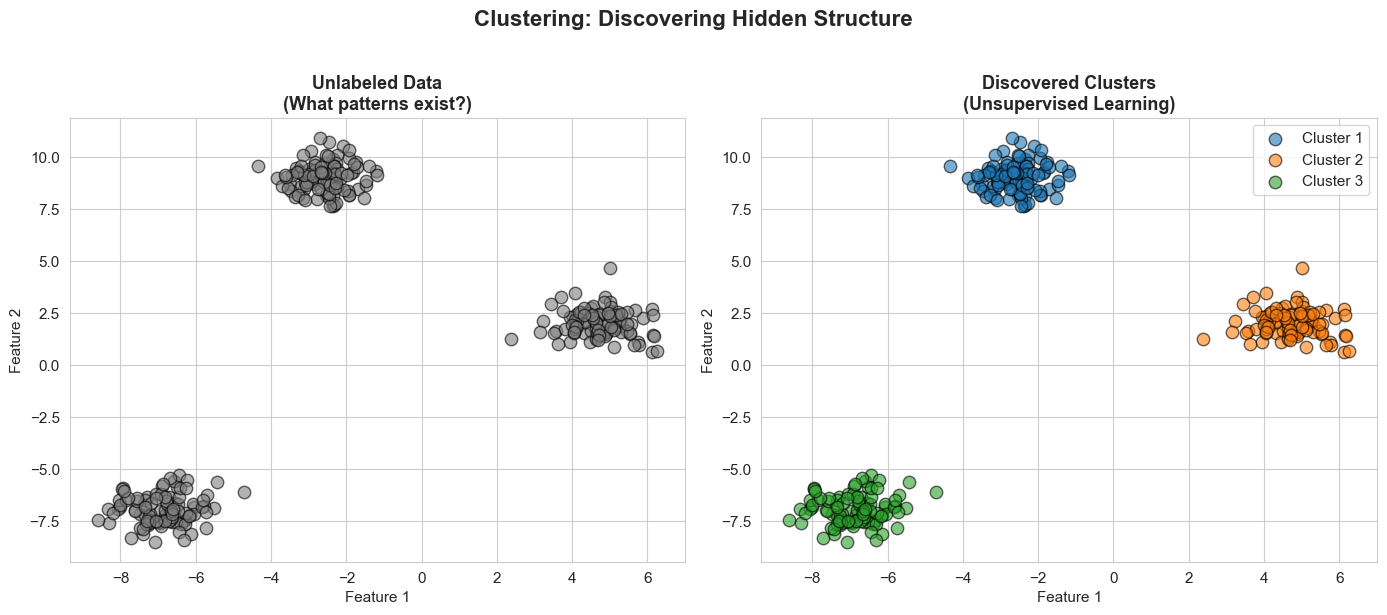

Dataset: 300 samples, 2 features
True number of clusters: 3


In [2]:
# Generate synthetic data with 3 natural clusters
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2,
                       cluster_std=0.7, random_state=42)

# Visualize unlabeled vs discovered clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Unlabeled data
axes[0].scatter(X[:, 0], X[:, 1], s=80, alpha=0.6, c='gray', edgecolors='k')
axes[0].set_title('Unlabeled Data\n(What patterns exist?)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Right: True clusters (for illustration)
for i in range(3):
    mask = y_true == i
    axes[1].scatter(X[mask, 0], X[mask, 1], s=80, alpha=0.6,
                   edgecolors='k', label=f'Cluster {i+1}')

axes[1].set_title('Discovered Clusters\n(Unsupervised Learning)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.suptitle('Clustering: Discovering Hidden Structure', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"True number of clusters: {len(np.unique(y_true))}")

<a id='part2'></a>
## 3. Part 2: K-Means Clustering

### K-Means Algorithm

**Goal:** Partition $n$ data points into $K$ clusters

**Objective:** Minimize within-cluster sum of squares (WCSS)

$$J = \sum_{k=1}^{K} \sum_{\mathbf{x}_i \in C_k} \|\mathbf{x}_i - \boldsymbol{\mu}_k\|^2$$

**Algorithm (Lloyd's):**
1. Initialize $K$ centroids randomly
2. **Repeat** until convergence:
   - **Assignment:** Assign each point to nearest centroid
   - **Update:** Recompute centroids as cluster means

In [3]:
# Implement K-Means from scratch
class KMeansFromScratch:
    """Simple K-Means implementation for educational purposes"""
    
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        
    def fit(self, X):
        """Fit K-Means to data X"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly from data points
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[idx].copy()
        
        for iteration in range(self.max_iters):
            # Assignment step: assign points to nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)
            
            # Update step: recompute centroids
            new_centroids = np.array([X[self.labels == k].mean(axis=0)
                                     for k in range(self.n_clusters)])
            
            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                print(f"Converged after {iteration + 1} iterations")
                break
            
            self.centroids = new_centroids
        
        # Compute final inertia
        self.inertia_ = sum([np.sum((X[self.labels == k] - self.centroids[k])**2)
                            for k in range(self.n_clusters)])
        
        return self
    
    def predict(self, X):
        """Predict cluster labels for X"""
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Test our implementation
kmeans_scratch = KMeansFromScratch(n_clusters=3, random_state=42)
kmeans_scratch.fit(X)

print(f"\nFinal inertia: {kmeans_scratch.inertia_:.2f}")
print(f"Centroids:\n{kmeans_scratch.centroids}")

Converged after 3 iterations

Final inertia: 277.76
Centroids:
[[-2.59602216  9.03478469]
 [-6.88259841 -6.95282178]
 [ 4.71493601  1.9993669 ]]


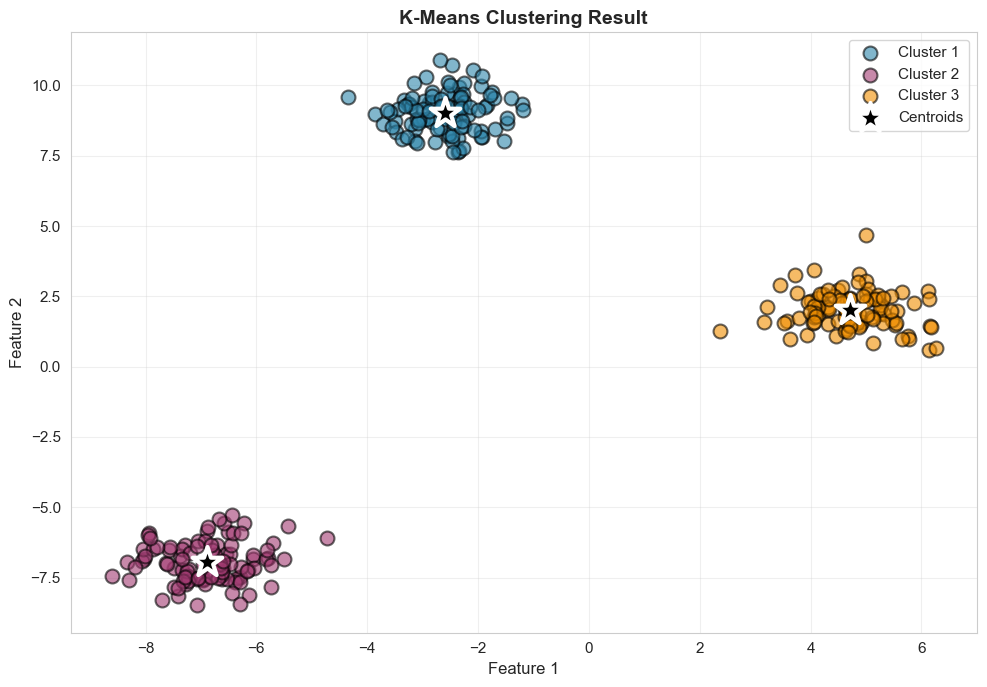

In [4]:
# Visualize K-Means result
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Plot clusters
colors = ['#2E86AB', '#A23B72', '#F18F01']
for k in range(3):
    mask = kmeans_scratch.labels == k
    ax.scatter(X[mask, 0], X[mask, 1], s=100, alpha=0.6,
              c=colors[k], edgecolors='k', linewidth=1.5,
              label=f'Cluster {k+1}')

# Plot centroids
ax.scatter(kmeans_scratch.centroids[:, 0],
          kmeans_scratch.centroids[:, 1],
          s=500, marker='*', c='black', edgecolors='white',
          linewidth=3, label='Centroids', zorder=10)

ax.set_title('K-Means Clustering Result', fontweight='bold', fontsize=14)
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Choosing K: Elbow Method & Silhouette Analysis

Converged after 2 iterations


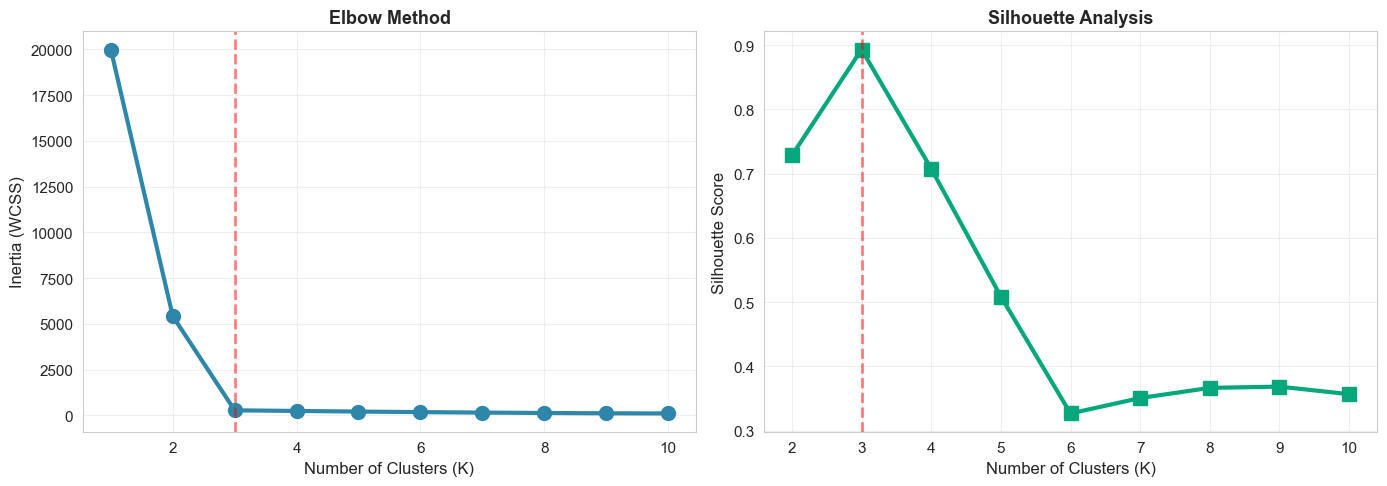


Optimal K (Elbow): Around 3-4
Optimal K (Silhouette): 3


In [5]:
# Elbow method: plot inertia for different K values
K_range = range(1, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    if k == 1:
        # K=1 special case
        kmeans = KMeansFromScratch(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(0)  # Undefined for K=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

# Plot both metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(K_range, inertias, marker='o', markersize=10,
            linewidth=3, color='#2E86AB')
axes[0].axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method', fontweight='bold', fontsize=13)
axes[0].grid(alpha=0.3)

# Silhouette plot
axes[1].plot(list(K_range)[1:], silhouette_scores[1:],
            marker='s', markersize=10, linewidth=3, color='#06A77D')
axes[1].axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontweight='bold', fontsize=13)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal K (Elbow): Around 3-4")
print(f"Optimal K (Silhouette): {list(K_range)[1:][np.argmax(silhouette_scores[1:])]}")

<a id='part3'></a>
## 4. Part 3: Hierarchical Clustering

### Agglomerative Clustering

**Bottom-up approach:**
1. Start with each point as its own cluster
2. Iteratively merge the closest clusters
3. Continue until one cluster remains
4. Visualize with dendrogram

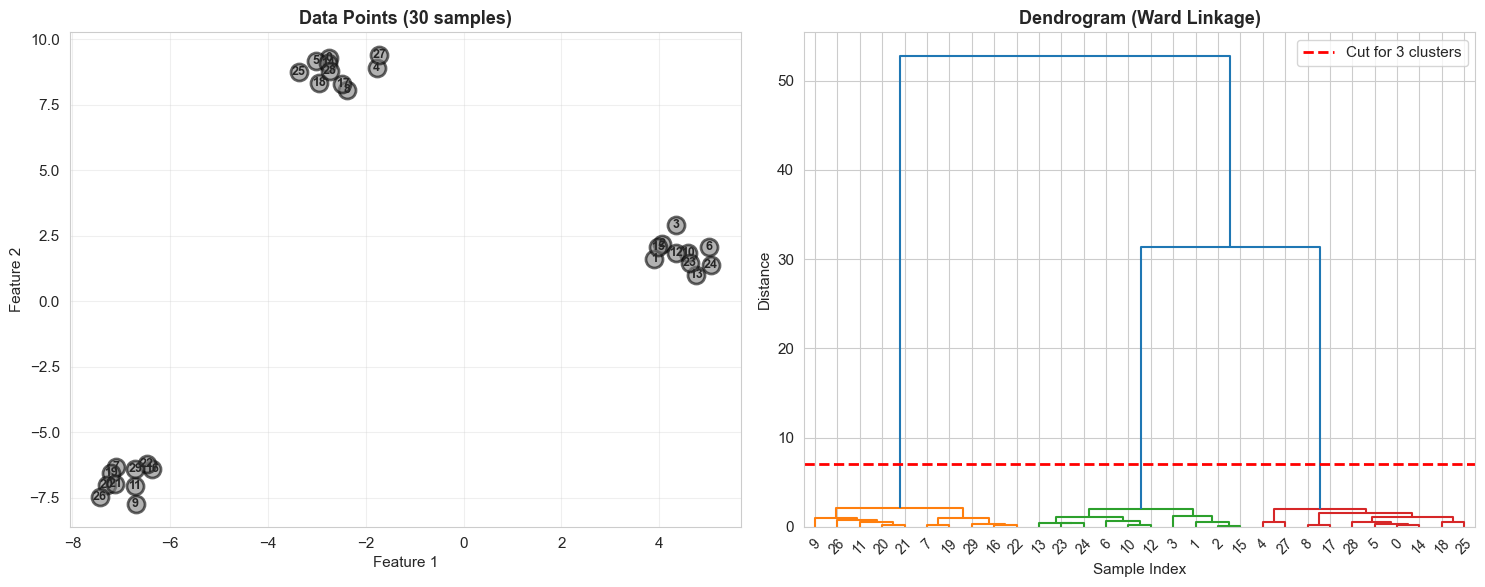

Dendrogram shows hierarchical cluster structure!


In [6]:
# Use smaller dataset for clarity
X_small, y_small = make_blobs(n_samples=30, centers=3, n_features=2,
                              cluster_std=0.5, random_state=42)

# Compute linkage matrix using Ward's method
linkage_matrix = linkage(X_small, method='ward')

# Plot dendrogram
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left: Data points
axes[0].scatter(X_small[:, 0], X_small[:, 1], s=150, alpha=0.6,
               c='gray', edgecolors='k', linewidth=2)
for i in range(len(X_small)):
    axes[0].text(X_small[i, 0], X_small[i, 1], str(i),
                fontsize=9, ha='center', va='center', fontweight='bold')
axes[0].set_title('Data Points (30 samples)', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(alpha=0.3)

# Right: Dendrogram
dendrogram(linkage_matrix, ax=axes[1], color_threshold=7)
axes[1].axhline(y=7, color='red', linestyle='--', linewidth=2,
               label='Cut for 3 clusters')
axes[1].set_title('Dendrogram (Ward Linkage)', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Distance')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Dendrogram shows hierarchical cluster structure!")

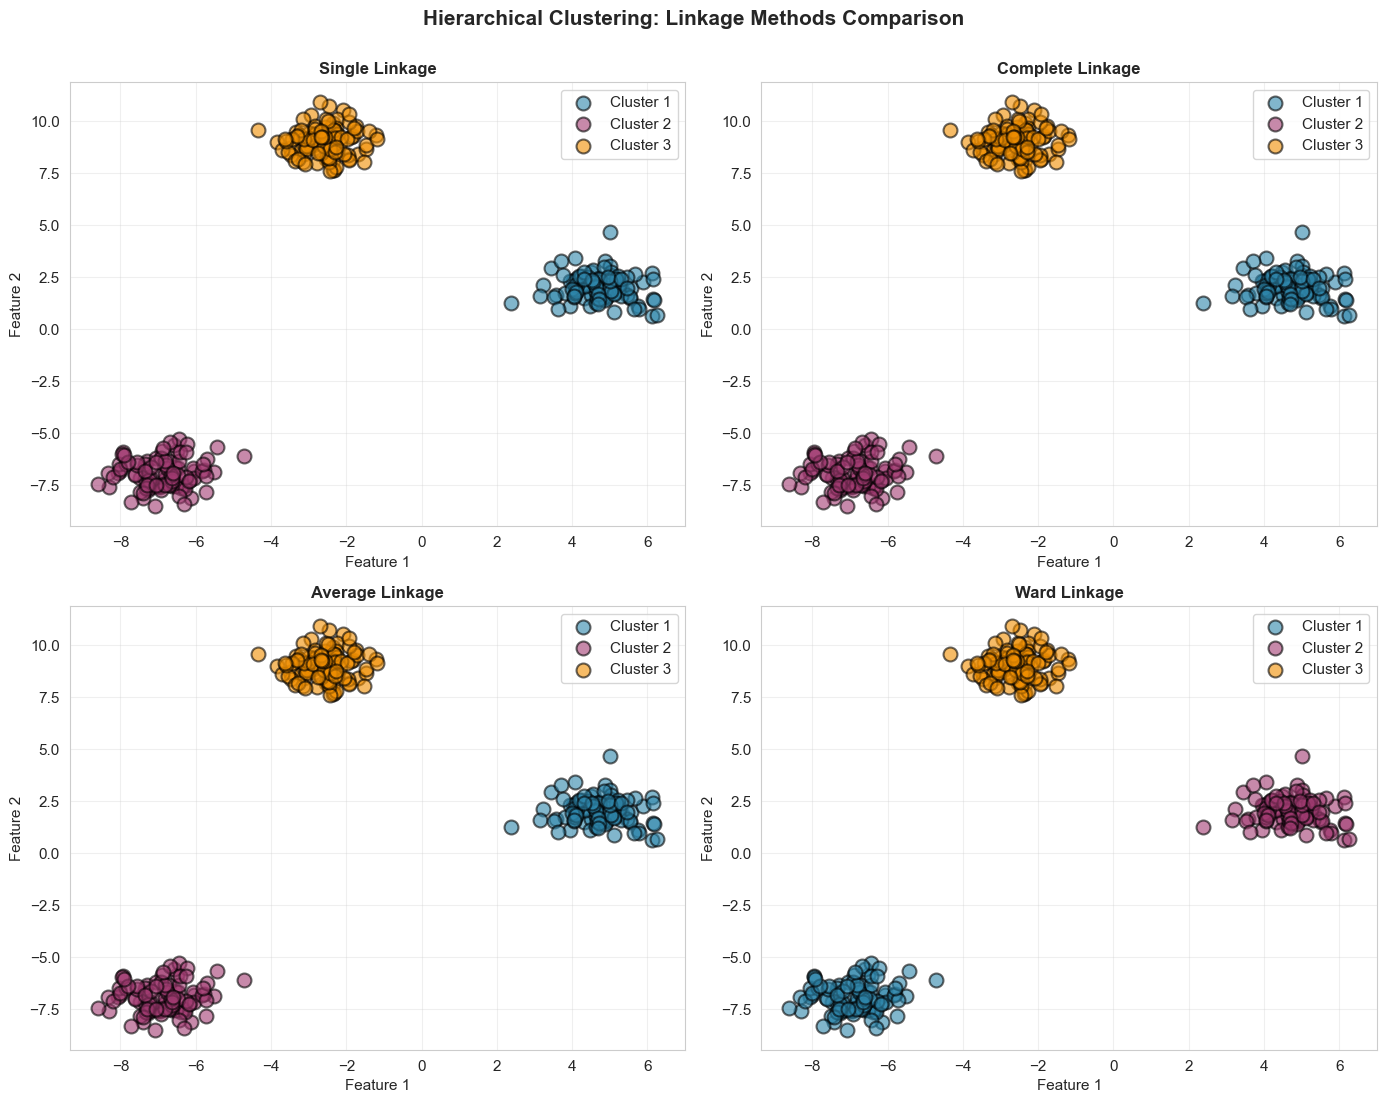

In [7]:
# Compare different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(2, 2, figsize=(14, 11))
axes = axes.flatten()

for idx, method in enumerate(linkage_methods):
    # Fit agglomerative clustering
    agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg.fit_predict(X)
    
    # Plot
    for k in range(3):
        mask = labels == k
        axes[idx].scatter(X[mask, 0], X[mask, 1], s=100, alpha=0.6,
                         c=colors[k], edgecolors='k', linewidth=1.5,
                         label=f'Cluster {k+1}')
    
    axes[idx].set_title(f'{method.capitalize()} Linkage',
                       fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.suptitle('Hierarchical Clustering: Linkage Methods Comparison',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

<a id='part4'></a>
## 5. Part 4: Evaluation Metrics

### Internal Validation (No ground truth needed)

1. **Silhouette Coefficient**: Measures how similar points are within clusters vs other clusters
2. **Davies-Bouldin Index**: Lower is better (cluster separation)
3. **Calinski-Harabasz Score**: Higher is better (variance ratio)

### External Validation (Ground truth available)

1. **Adjusted Rand Index (ARI)**: Agreement with true labels
2. **Normalized Mutual Information (NMI)**: Information-theoretic measure

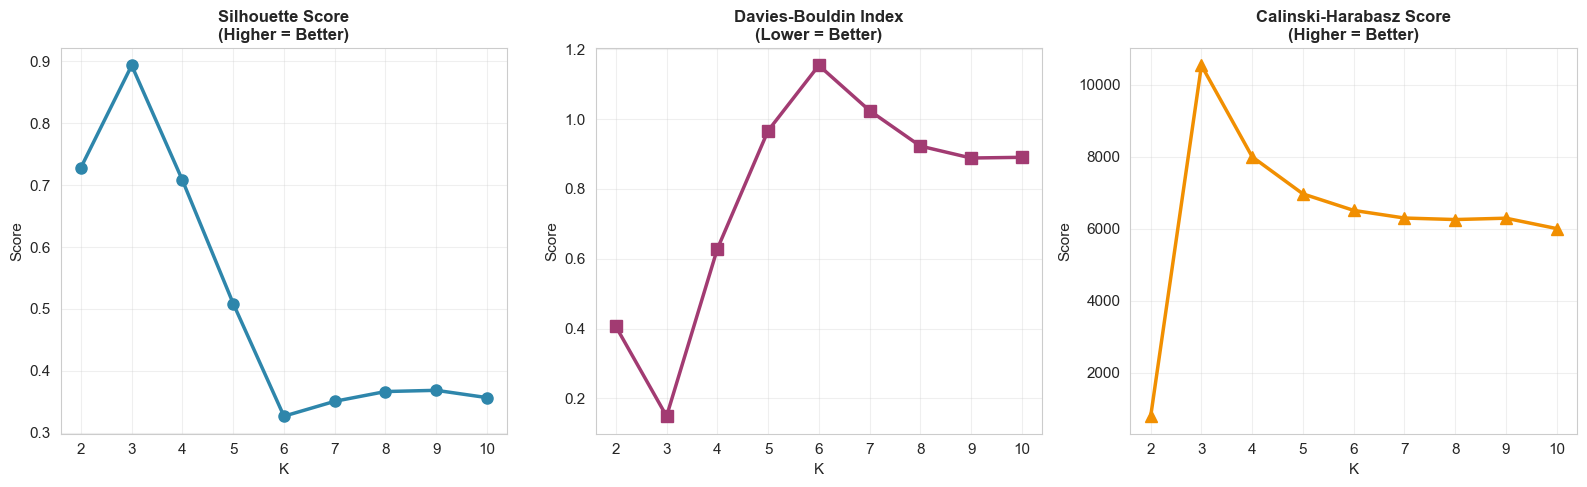


Best K according to each metric:
  Silhouette: K = 3
  Davies-Bouldin: K = 3
  Calinski-Harabasz: K = 3


In [8]:
# Compute internal validation metrics
K_values = range(2, 11)
metrics = {
    'Silhouette': [],
    'Davies-Bouldin': [],
    'Calinski-Harabasz': []
}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    metrics['Silhouette'].append(silhouette_score(X, labels))
    metrics['Davies-Bouldin'].append(davies_bouldin_score(X, labels))
    metrics['Calinski-Harabasz'].append(calinski_harabasz_score(X, labels))

# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].plot(K_values, metrics['Silhouette'], marker='o',
            markersize=8, linewidth=2.5, color='#2E86AB')
axes[0].set_title('Silhouette Score\n(Higher = Better)',
                 fontweight='bold', fontsize=12)
axes[0].set_xlabel('K')
axes[0].set_ylabel('Score')
axes[0].grid(alpha=0.3)

axes[1].plot(K_values, metrics['Davies-Bouldin'], marker='s',
            markersize=8, linewidth=2.5, color='#A23B72')
axes[1].set_title('Davies-Bouldin Index\n(Lower = Better)',
                 fontweight='bold', fontsize=12)
axes[1].set_xlabel('K')
axes[1].set_ylabel('Score')
axes[1].grid(alpha=0.3)

axes[2].plot(K_values, metrics['Calinski-Harabasz'], marker='^',
            markersize=8, linewidth=2.5, color='#F18F01')
axes[2].set_title('Calinski-Harabasz Score\n(Higher = Better)',
                 fontweight='bold', fontsize=12)
axes[2].set_xlabel('K')
axes[2].set_ylabel('Score')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBest K according to each metric:")
print(f"  Silhouette: K = {list(K_values)[np.argmax(metrics['Silhouette'])]}")
print(f"  Davies-Bouldin: K = {list(K_values)[np.argmin(metrics['Davies-Bouldin'])]}")
print(f"  Calinski-Harabasz: K = {list(K_values)[np.argmax(metrics['Calinski-Harabasz'])]}")

In [9]:
# External validation (using true labels)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

print(f"External Validation Metrics:")
print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
print(f"  Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"\nInterpretation:")
print(f"  ARI = 1 means perfect agreement with true labels")
print(f"  NMI = 1 means perfect mutual information")
print(f"  Both scores close to 1 indicate excellent clustering!")

External Validation Metrics:
  Adjusted Rand Index (ARI): 1.0000
  Normalized Mutual Information (NMI): 1.0000

Interpretation:
  ARI = 1 means perfect agreement with true labels
  NMI = 1 means perfect mutual information
  Both scores close to 1 indicate excellent clustering!


<a id='part5'></a>
## 6. Part 5: Advanced Topics - Gaussian Mixture Models

### Soft Clustering with GMM

Unlike K-Means (hard assignment), GMM provides **probabilistic** cluster assignments.

**Model:**
$$p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$$

**Advantages:**
- Soft assignments (probabilities)
- Flexible cluster shapes (elliptical)
- Measures uncertainty

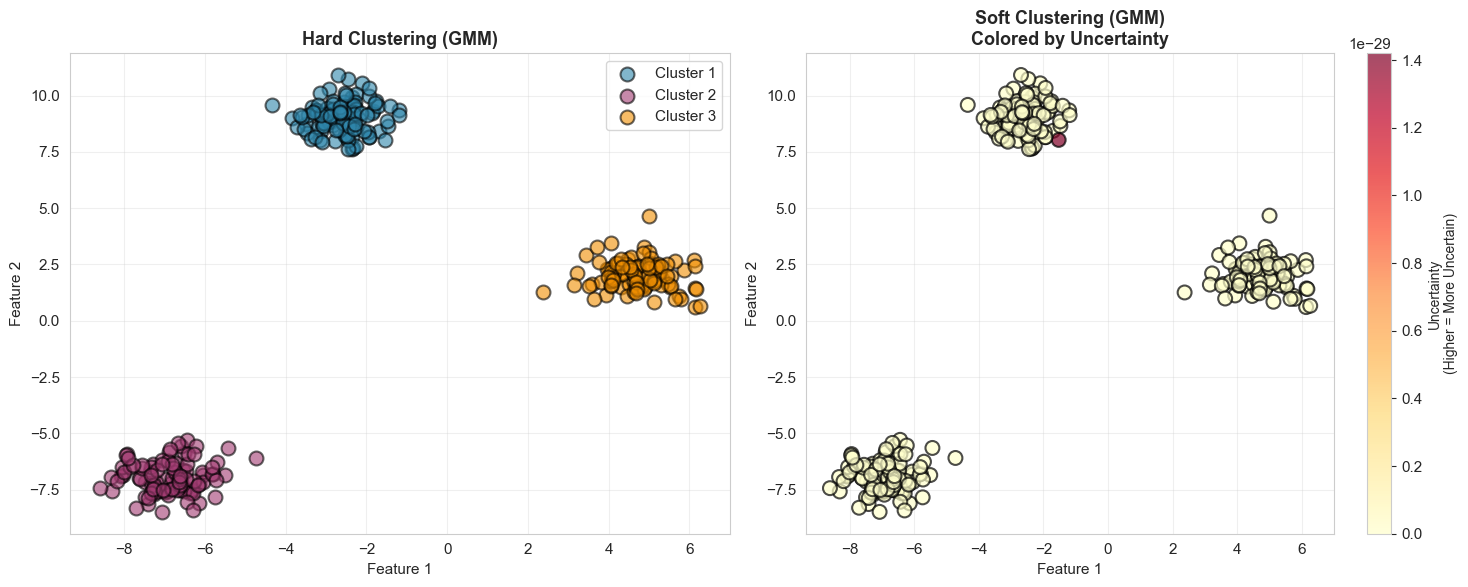


GMM Results:
  Means:
[[-2.59602216  9.03478469]
 [-6.88259841 -6.95282178]
 [ 4.71493601  1.9993669 ]]
  Mixing coefficients (π): [0.33333333 0.33333333 0.33333333]
  Mean uncertainty: 0.0000


In [10]:
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
y_pred_gmm = gmm.predict(X)
probabilities = gmm.predict_proba(X)

# Compute uncertainty (entropy of probability distribution)
from scipy.stats import entropy
uncertainties = entropy(probabilities.T)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left: Hard clustering (like K-Means)
for k in range(3):
    mask = y_pred_gmm == k
    axes[0].scatter(X[mask, 0], X[mask, 1], s=100, alpha=0.6,
                   c=colors[k], edgecolors='k', linewidth=1.5,
                   label=f'Cluster {k+1}')
axes[0].set_title('Hard Clustering (GMM)',
                 fontweight='bold', fontsize=13)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Right: Soft clustering (colored by uncertainty)
scatter = axes[1].scatter(X[:, 0], X[:, 1], c=uncertainties,
                         s=100, cmap='YlOrRd', alpha=0.7,
                         edgecolors='k', linewidth=1.5)
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Uncertainty\n(Higher = More Uncertain)', fontsize=10)
axes[1].set_title('Soft Clustering (GMM)\nColored by Uncertainty',
                 fontweight='bold', fontsize=13)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nGMM Results:")
print(f"  Means:\n{gmm.means_}")
print(f"  Mixing coefficients (π): {gmm.weights_}")
print(f"  Mean uncertainty: {uncertainties.mean():.4f}")

<a id='challenge'></a>
## 7. 🎯 Student Challenge (15-20 minutes)

### Problem Statement

The **Iris dataset** contains measurements of 150 iris flowers from 3 species:
- Setosa
- Versicolor  
- Virginica

**Features:** Sepal length, sepal width, petal length, petal width

### Your Task

1. Load the Iris dataset
2. **Standardize** the features (important!)
3. Apply **K-Means** with K=3
4. Apply **Hierarchical** clustering (Ward linkage)
5. Compute **ARI** and **NMI** for both methods
6. Visualize the clusters (use first 2 features or PCA)
7. **Answer:** Which method works better for Iris? Why?

### Hints

- Use `StandardScaler` from sklearn
- Try both raw features and PCA projection
- Compare clustering with true species labels
- Consider cluster shapes and separability

### Evaluation Criteria

- ✓ Correct preprocessing (standardization)
- ✓ Proper implementation of both methods
- ✓ Accurate metric computation
- ✓ Clear visualization
- ✓ Thoughtful analysis

In [11]:
# TODO: Your solution here

# Step 1: Load Iris dataset
# iris = load_iris()
# X_iris = iris.data
# y_iris = iris.target

# Step 2: Standardize features
# scaler = StandardScaler()
# X_iris_scaled = scaler.fit_transform(X_iris)

# Step 3-7: Your code here

# Uncomment and complete:
pass

<a id='solutions'></a>
## 8. 💡 Solutions

<details>
<summary><b>Click to reveal solution</b></summary>

### Solution Approach

1. Load and standardize data
2. Apply both clustering methods
3. Evaluate with metrics
4. Visualize results
5. Analyze differences

</details>

Iris dataset: 150 samples, 4 features
Classes: ['setosa' 'versicolor' 'virginica']

K-Means:
  ARI: 0.6201
  NMI: 0.6595

Hierarchical (Ward):
  ARI: 0.6153
  NMI: 0.6755


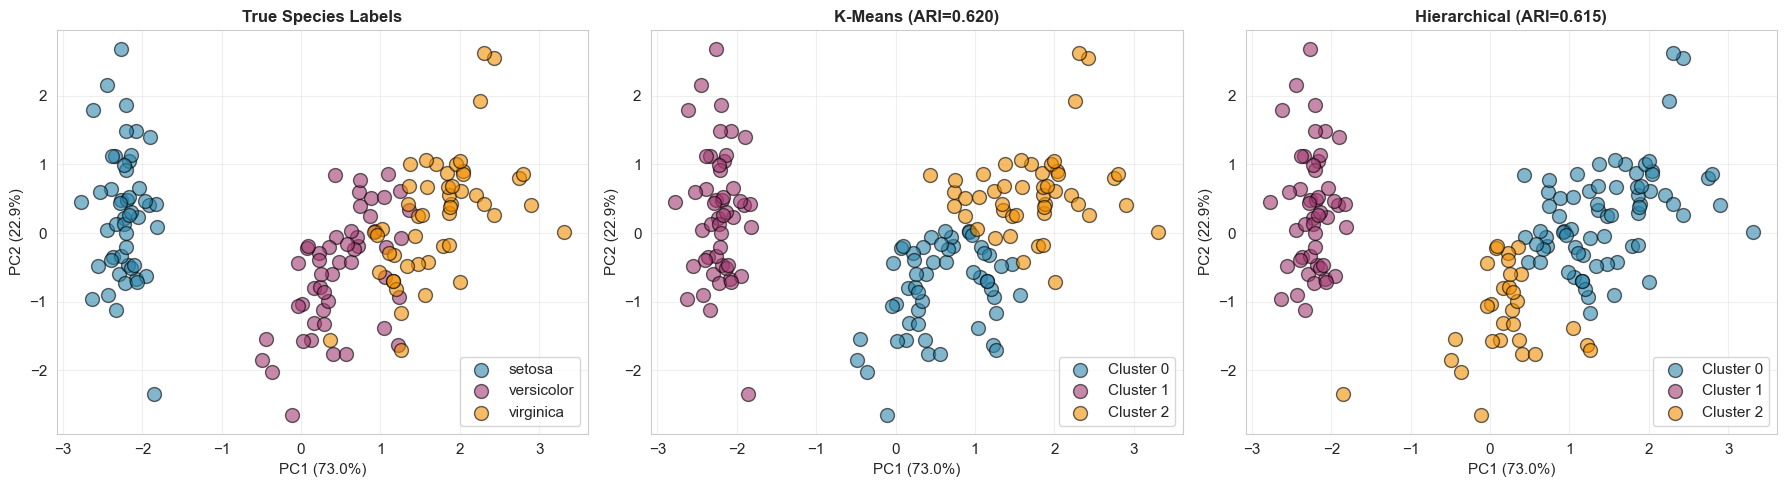


✅ Solution complete! Both methods perform well on Iris.
   Setosa is well-separated, but Versicolor/Virginica overlap.


In [12]:
# SOLUTION - Do not peek until you've tried!

from sklearn.decomposition import PCA

# Load Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
species_names = iris.target_names

print(f"Iris dataset: {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"Classes: {species_names}")

# Standardize
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# K-Means
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans_iris.fit_predict(X_iris_scaled)

# Hierarchical
agg_iris = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agg = agg_iris.fit_predict(X_iris_scaled)

# Metrics
print(f"\nK-Means:")
print(f"  ARI: {adjusted_rand_score(y_iris, y_kmeans):.4f}")
print(f"  NMI: {normalized_mutual_info_score(y_iris, y_kmeans):.4f}")

print(f"\nHierarchical (Ward):")
print(f"  ARI: {adjusted_rand_score(y_iris, y_agg):.4f}")
print(f"  NMI: {normalized_mutual_info_score(y_iris, y_agg):.4f}")

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris_scaled)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels
for i in range(3):
    mask = y_iris == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], s=100, alpha=0.6,
                   c=colors[i], edgecolors='k', label=species_names[i])
axes[0].set_title('True Species Labels', fontweight='bold', fontsize=12)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# K-Means
for i in range(3):
    mask = y_kmeans == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], s=100, alpha=0.6,
                   c=colors[i], edgecolors='k', label=f'Cluster {i}')
axes[1].set_title(f'K-Means (ARI={adjusted_rand_score(y_iris, y_kmeans):.3f})',
                 fontweight='bold', fontsize=12)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Hierarchical
for i in range(3):
    mask = y_agg == i
    axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1], s=100, alpha=0.6,
                   c=colors[i], edgecolors='k', label=f'Cluster {i}')
axes[2].set_title(f'Hierarchical (ARI={adjusted_rand_score(y_iris, y_agg):.3f})',
                 fontweight='bold', fontsize=12)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Solution complete! Both methods perform well on Iris.")
print("   Setosa is well-separated, but Versicolor/Virginica overlap.")

<a id='summary'></a>
## 9. 📝 Summary & Next Steps

### Key Takeaways

✅ **Clustering Fundamentals**
- Unsupervised learning discovers patterns without labels
- Distance metrics are foundation (Euclidean, cosine, etc.)
- Two main types: Partitional vs Hierarchical

✅ **K-Means Algorithm**
- Fast, simple, scalable
- Iterative: Assignment → Update → Repeat
- Sensitive to initialization (use K-Means++)
- Works well for spherical clusters

✅ **Hierarchical Clustering**
- Builds tree of clusters (dendrogram)
- No need to specify K upfront
- Different linkage methods (single, complete, average, Ward)
- More interpretable but slower

✅ **Gaussian Mixture Models**
- Soft probabilistic assignments
- Flexible elliptical cluster shapes
- EM algorithm for learning
- Measures uncertainty

✅ **Validation Metrics**
- **Internal:** Silhouette, Davies-Bouldin, Calinski-Harabasz
- **External:** ARI, NMI (when ground truth available)
- Use multiple metrics for robustness

### What You've Learned

- **Theoretical:** Clustering objectives, convergence, complexity
- **Practical:** Implementation from scratch, scikit-learn usage
- **Evaluation:** Internal and external validation
- **Applications:** Real datasets (Iris), visualization techniques

### Next Steps

1. **Practice:** Try clustering on your own datasets
   - Customer data, images, documents, etc.
   - Experiment with preprocessing and parameters

2. **Explore:** Advanced clustering methods
   - DBSCAN (density-based)
   - Spectral clustering (graph-based)
   - Mean Shift, Affinity Propagation

3. **Read:** Key papers and textbooks
   - Arthur & Vassilvitskii (2007): K-Means++
   - Dempster et al. (1977): EM Algorithm
   - Bishop: Pattern Recognition & ML (Ch. 9)

4. **Apply:** Real-world projects
   - Customer segmentation
   - Image compression
   - Anomaly detection

### Additional Resources

- 📖 **Textbook:** Murphy, K. P. "Probabilistic Machine Learning" (Ch. 21)
- 📄 **Papers:** Classic clustering papers on arXiv
- 💻 **Code:** scikit-learn clustering documentation
- 🎓 **Courses:** Stanford CS229, Coursera ML specialization

---

**Thank you for completing this workshop!**

*Questions? Contact: Noel Jeffrey Pinton*  
*Department of Computer Science, University of the Philippines - Cebu*